# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

Before starting the project, we must ask the questions, why are we looking at this data? what purpose will if gives us? 
why is the particpation low in certain states? what can we do to increase it? etc...trends and stuff
which states scores the highest? 
select a couple of states and research on possible reasons why.

What is the probability of student scoring X?
95% confident intervals

1. What is the purpose of SAT/ACT? These test are to measure student's readiness for college and to predict future academic success.

2. What are the the SAT/ACT? We know it's a test at the end of high school to enter college and to test college aptitude 

3. What we don't know? Other years, other requires, What is the population for each state?

4. Main question, is there a correlation between participation and score? 

5. Is taking the test a requirement for all states? No, thus the low participation percentage in some states.
a. which states requires the SAT to graduate?

6. What is the cost of the SAT vs ACT?
SAT cost:
$60 with essay
$46 without essay
ACT cost:
$42 no writing
$62.50 with writing

7. Which State has free ACT?
Alabama
Arkansas
Colorado
Hawaii
Kentucky
Louisiana
Mississippi
Missouri
Montana
Nevada
North Carolina
Oklahoma
South Carolina
Utah
Wisconsin
Wyoming

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import imp

sns.set_style()


%matplotlib inline

In [107]:
act_csv_path = '.././data/act.csv'
sat_csv_path = '.././data/sat.csv'

act_df = pd.read_csv(act_csv_path)
sat_df = pd.read_csv(sat_csv_path)

act_df = act_df.rename(index=str, columns={"Unnamed: 0": "StateIndex"})
sat_df = sat_df.rename(index=str, columns={"Unnamed: 0": "StateIndex"})

#### 2. Print the first ten rows of each dataframe.

In [108]:
act_df.head(10)

,StateIndex,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [109]:
sat_df.head(10)

,StateIndex,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


#### In the ACT Dataframe, this code gets rid of the National row because it's not needed and Maryland since the data is an outlier, probably mistype info and I didn't have time to dig to for the correct value

In [110]:
act_df.drop(['0','21'], inplace=True)

#### In the SAT Dataframe, this code removes Maryland as an outlier because the scores were outside the normal SAT scores.

In [111]:
sat_df.drop(['20'], inplace=True)

#### This list comprehension fixes the index in the ACT Dataframe to match the SAT Dataframe

In [112]:
act_df['StateIndex'] = [i for i, value in enumerate(act_df['StateIndex'])]

#### This code rename the columns, this is not the ideal way to do it. but it was quick and dirty

In [113]:
act_df.columns = ['StateIndex', 'State', 'ACT_Part', 'English', 'ACT_Math', 'Reading', 'Science', 'Composite']
sat_df.columns = ['StateIndex', 'State', 'SAT_Part', 'EB-Read+Write', 'SAT_Math', 'SAT_Total']

#### This line of code briefly gives a summary of the SAT Dataframe, you can see mean and median (50%) and kind of get an idea of the distribution and if there are any outliers

In [163]:
round(sat_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
StateIndex,50.0,25.10,15.00,0.00,12.25,25.50,37.75,50.0
SAT_Part,50.0,0.39,0.35,0.02,0.04,0.34,0.65,1.0
EB-Read+Write,50.0,569.78,45.88,482.00,532.75,559.50,613.50,644.0
SAT_Math,50.0,557.54,47.36,468.00,523.25,549.50,601.00,651.0
SAT_Total,50.0,1127.42,92.95,950.00,1055.25,1107.50,1214.00,1295.0


## 3. Describe in words what each variable (column) is.

#### act.csv file
1. Unnamed:0 - Index of the State
2. State - Where the Student is from
3. Participation - Percent Participation in unknown Catergory
4. English - Score for English
5. Math - Score for Math
6. Reading - Score for Reading
7. Science - Score for Science
8. Composite - Scote for Composite

#### sat.csv file
1. Unnamed:0 - Index of the State
2. State - Where the Student is from
3. Participation - Percent Participation in unknown Catergory
4. Evidence-Based Reading and Writing - Score for Reading and Writing
5. Math - Score for Math
6. Total - Aggregate of the Scores


#### 4. Does the data look complete? Are there any obvious issues with the observations?

What does complete mean? No NAs, No zeros, Participation is an object, thus further clean up is needed. Need to remove % sign and convert type to numeric float

In [166]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 51
Data columns (total 8 columns):
StateIndex    50 non-null int64
State         50 non-null object
ACT_Part      50 non-null float64
English       50 non-null float64
ACT_Math      50 non-null float64
Reading       50 non-null float64
Science       50 non-null float64
Composite     50 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.5+ KB


##### 5. Print the types of each column.

In [165]:
act_df.dtypes

StateIndex      int64
State          object
ACT_Part      float64
English       float64
ACT_Math      float64
Reading       float64
Science       float64
Composite     float64
dtype: object

In [14]:
sat_df.dtypes

StateIndex        int64
State            object
SAT_Part         object
EB-Read+Write     int64
SAT_Math          int64
SAT_Total         int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [167]:
act_df.ACT_Part = [i.strip('%') for i in act_df.ACT_Part]
act_df['ACT_Part']= act_df.ACT_Part.astype(float) / 100
sat_df.SAT_Part = [i.strip('%') for i in sat_df.SAT_Part]
sat_df['SAT_Part']= sat_df.SAT_Part.astype(float) / 100

AttributeError: 'float' object has no attribute 'strip'

In [116]:
sat_df.dtypes

StateIndex         int64
State             object
SAT_Part         float64
EB-Read+Write      int64
SAT_Math           int64
SAT_Total          int64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [117]:
act_dict = act_df.set_index('State').to_dict()
sat_dict = sat_df.set_index('State').to_dict()

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [118]:
act_dict1 = act_df.to_dict('list')
sat_dict2 = sat_df.to_dict('list')

##### 9. Merge the dataframes on the state column.

In [119]:
merge_df = pd.merge(act_df, sat_df, left_on='State', right_on='State')
merge_df.drop(columns='StateIndex_x', inplace = True)
merge_df.drop(columns='StateIndex_y', inplace = True)

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

see above in #2

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [120]:
summary_df = merge_df.describe().T
round(summary_df,2)

,count,mean,std,min,25%,50%,75%,max
ACT_Part,50.0,0.66,0.32,0.08,0.31,0.71,1.00,1.0
English,50.0,20.88,2.35,16.30,19.00,20.55,23.10,25.5
ACT_Math,50.0,21.14,1.98,18.00,19.40,20.90,23.00,25.3
Reading,50.0,21.97,2.06,18.10,20.42,21.70,23.88,26.0
Science,50.0,21.42,1.74,18.20,19.92,21.30,22.98,24.9
Composite,50.0,21.48,2.02,17.80,19.80,21.40,23.40,25.5
SAT_Part,50.0,0.39,0.35,0.02,0.04,0.34,0.65,1.0
EB-Read+Write,50.0,569.78,45.88,482.00,532.75,559.50,613.50,644.0
SAT_Math,50.0,557.54,47.36,468.00,523.25,549.50,601.00,651.0
SAT_Total,50.0,1127.42,92.95,950.00,1055.25,1107.50,1214.00,1295.0


In [121]:
merge_df.keys()

Index(['State', 'ACT_Part', 'English', 'ACT_Math', 'Reading', 'Science',
       'Composite', 'SAT_Part', 'EB-Read+Write', 'SAT_Math', 'SAT_Total'],
      dtype='object')

In [122]:
ACT_scores_df = merge_df.drop(['State', 'ACT_Part', 'SAT_Part', 'SAT_Total', 'EB-Read+Write', 'SAT_Math'], axis = 1)
SAT_scores_df = merge_df.drop(['State', 'ACT_Part', 'English', 'ACT_Math', 'Reading', 'Science',
       'Composite', 'SAT_Part', 'SAT_Total'], axis = 1)

In [23]:
round(merge_df.corr() ,3)

,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total
ACT_Part,1.000,-0.840,-0.858,-0.863,-0.833,-0.855,-0.839,0.713,0.679,0.698
English,-0.840,1.000,0.967,0.986,0.980,0.991,0.682,-0.454,-0.413,-0.434
ACT_Math,-0.858,0.967,1.000,0.979,0.987,0.990,0.706,-0.479,-0.413,-0.447
Reading,-0.863,0.986,0.979,1.000,0.988,0.995,0.700,-0.481,-0.434,-0.459
Science,-0.833,0.980,0.987,0.988,1.000,0.995,0.648,-0.414,-0.357,-0.386
Composite,-0.855,0.991,0.990,0.995,0.995,1.000,0.690,-0.463,-0.410,-0.437
SAT_Part,-0.839,0.682,0.706,0.700,0.648,0.690,1.000,-0.873,-0.854,-0.866
EB-Read+Write,0.713,-0.454,-0.479,-0.481,-0.414,-0.463,-0.873,1.000,0.987,0.997
SAT_Math,0.679,-0.413,-0.413,-0.434,-0.357,-0.410,-0.854,0.987,1.000,0.997
SAT_Total,0.698,-0.434,-0.447,-0.459,-0.386,-0.437,-0.866,0.997,0.997,1.000


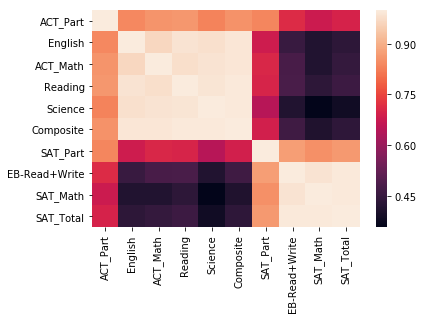

In [123]:
sns.heatmap(abs(round(merge_df.corr() ,3)));

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

### This table shows all the states with 100% participation in the ACT

There are a total of 17 States. 

In [126]:
one_hundred_part = merge_df['ACT_Part'] > .99
merge_df[one_hundred_part]

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
3,Arkansas,1.0,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
5,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
17,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247
18,Louisiana,1.0,19.4,18.8,19.8,19.6,19.5,0.04,611,586,1198
22,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295
23,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242
24,Missouri,1.0,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271
25,Montana,1.0,19.0,20.2,21.0,20.5,20.3,0.10,605,591,1196
27,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116


### This table shows all the states with 100% participation in the SAT

There are a total of 4 States

In [127]:
one_hundred_part = merge_df['SAT_Part'] > .99
merge_df[one_hundred_part]

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.0,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.0,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482,468,950
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.0,509,495,1005


##### Created column called ACT_total for the aggregate of the ACT scores

In [128]:
merge_df['ACT_Total'] = merge_df['English'] + merge_df['ACT_Math'] + merge_df['Reading'] + merge_df['Science'] + merge_df['Composite']

In [129]:
merge_df.head()

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,95.6
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,98.6
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,98.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,96.5
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,113.3


In [130]:
sd = [np.round((sum((merge_df[header]-np.mean(merge_df[header]))**2)/len(merge_df))**(1/2),2) 
      for header in merge_df.keys() if header != 'State']

In [131]:
sd

[0.32, 2.33, 1.96, 2.04, 1.72, 2.0, 0.35, 45.42, 46.89, 92.01, 10.0]

## Step 2: Manipulate the dataframe

In [132]:
merge_df.head(2)

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,95.6
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,98.6


##### 13. Turn the list `sd` into a new observation in your dataset.

In [133]:
type(sd)

list

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [169]:
merge_df.sort_values(by='SAT_Part', ascending=True).head(10)

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
33,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,100.8
23,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,92.5
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,109.1
24,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,101.4
43,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,101.1
40,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,108.3
26,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,106.6
48,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,102.1
22,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,106.8
49,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,100.8


In [135]:
merge_df.sort_values(by='SAT_Total', ascending=False).head()

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
22,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,106.8
48,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,102.1
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,109.1
24,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,101.4
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,108.1


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [136]:
part_gt_50 = merge_df['SAT_Part'] > .5
merge_df[part_gt_50].sort_values(by='SAT_Part', ascending=False).head()

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,120.0
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,120.5
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,125.5
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,120.2
28,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,126.9


In [137]:
part_gt_50_ACT = merge_df['ACT_Part'] > .5
merge_df[part_gt_50_ACT].sort_values(by='ACT_Part', ascending=False).head()

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,95.6
18,Louisiana,1.0,19.4,18.8,19.8,19.6,19.5,0.04,611,586,1198,97.1
48,Wisconsin,1.0,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,102.1
43,Utah,1.0,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,101.1
41,Tennessee,1.0,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228,98.5


In [138]:
Total_gt_1250 = merge_df['SAT_Total'] > 1250
merge_df[Total_gt_1250].sort_values(by='SAT_Total', ascending=False)

,State,ACT_Part,English,ACT_Math,Reading,Science,Composite,SAT_Part,EB-Read+Write,SAT_Math,SAT_Total,ACT_Total
22,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,106.8
48,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,102.1
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,109.1
24,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,101.4
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,108.1
33,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,100.8
26,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,106.6


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

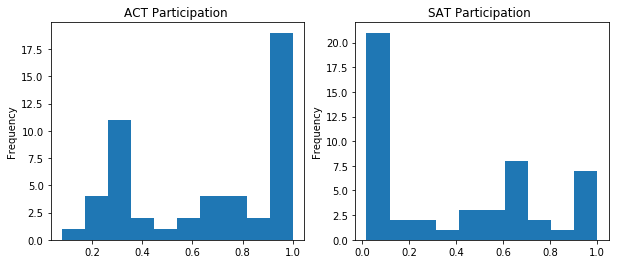

In [139]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
merge_df['ACT_Part'].plot(ax = ax[0], title = 'ACT Participation ', kind = 'hist')
merge_df['SAT_Part'].plot(ax = ax[1], title = 'SAT Participation ', kind = 'hist');

##### 17. Plot the Math(s) distributions from both data sets.

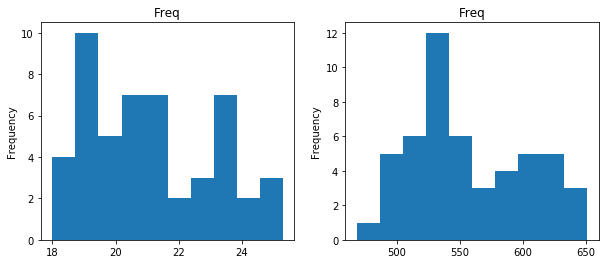

In [140]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
merge_df['ACT_Math'].plot(ax = ax[0], title = 'Freq', kind = 'hist')
merge_df['SAT_Math'].plot(ax = ax[1], title = 'Freq', kind = 'hist');

##### 18. Plot the Verbal distributions from both data sets.

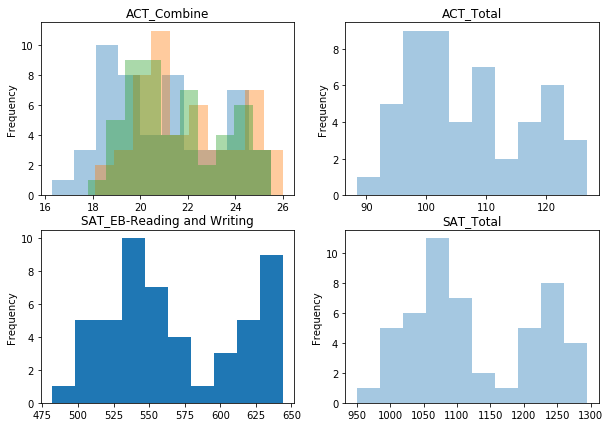

In [141]:
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
merge_df['English'].plot(ax = ax[0][0], title = 'ACT', kind = 'hist', alpha = 0.4)
merge_df['Reading'].plot(ax = ax[0][0], title = 'ACT', kind = 'hist', alpha = 0.4)
merge_df['Composite'].plot(ax = ax[0][0], title = 'ACT_Combine', kind = 'hist', alpha = 0.4)
merge_df['ACT_Total'].plot(ax = ax[0][1], title = 'ACT_Total', kind = 'hist', alpha = 0.4)
merge_df['SAT_Total'].plot(ax = ax[1][1], title = 'SAT_Total', kind = 'hist', alpha = 0.4)
merge_df['EB-Read+Write'].plot(ax = ax[1][0], title = 'SAT_EB-Reading and Writing', kind = 'hist');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Normal or not normal, skew left/right not not skewed, bimodal or unimodal

##### 20. Does this assumption hold true for any of our columns? Which?

In [ ]:
None.

##### 21. Plot some scatterplots examining relationships between all variables.

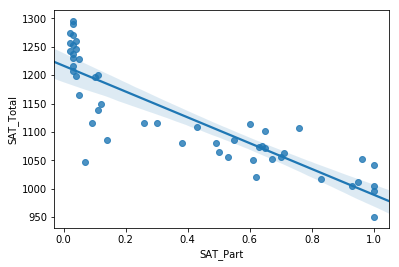

In [142]:
sns.regplot(merge_df.SAT_Part, merge_df.SAT_Total);

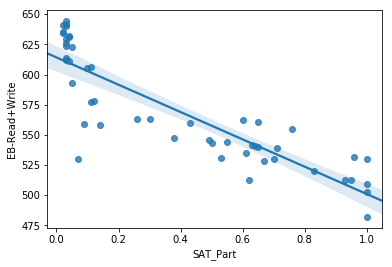

In [143]:
sns.regplot(merge_df.SAT_Part, merge_df['EB-Read+Write']);

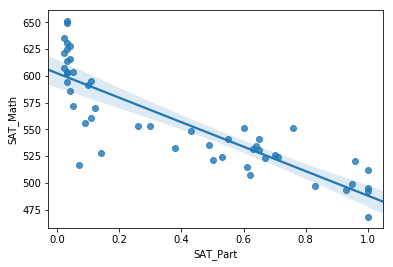

In [145]:
sns.regplot(merge_df.SAT_Part, merge_df['SAT_Math']);

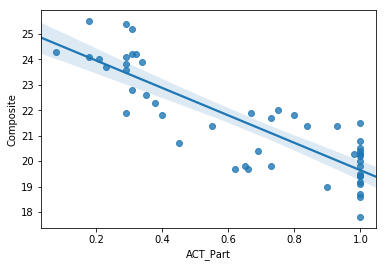

In [146]:
sns.regplot(merge_df.ACT_Part, merge_df['Composite']);

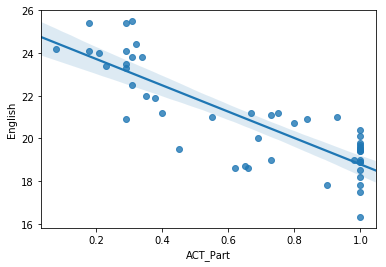

In [147]:
sns.regplot(merge_df.ACT_Part, merge_df.English);

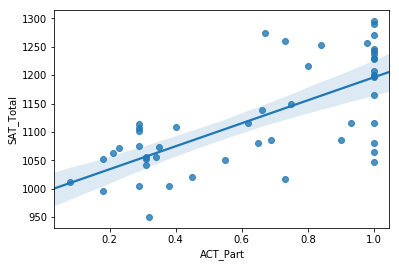

In [148]:
sns.regplot(merge_df.ACT_Part, merge_df.SAT_Total);

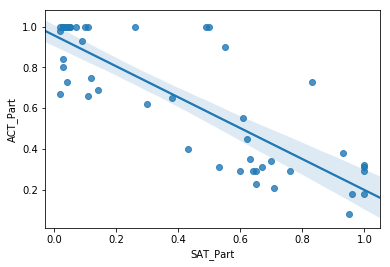

In [149]:
sns.regplot(merge_df.SAT_Part, merge_df.ACT_Part);

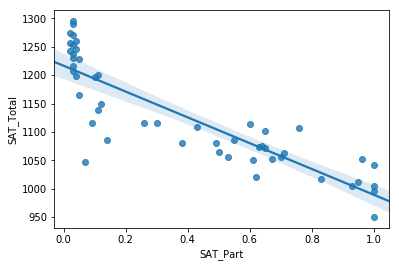

In [150]:
sns.regplot(merge_df.SAT_Part, merge_df.SAT_Total);

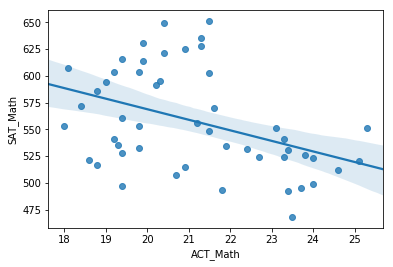

In [151]:
sns.regplot(merge_df.ACT_Math, merge_df.SAT_Math);

##### 22. Are there any interesting relationships to note?

Seems as though, there is a positive relationship between those who take one test and scoring higher on the other test

##### 23. Create box plots for each variable. 

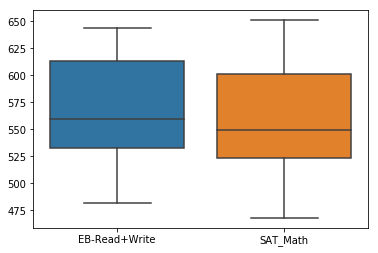

In [152]:
sns.boxplot(data=SAT_scores_df);

In [ ]:
This boxplot shows the 

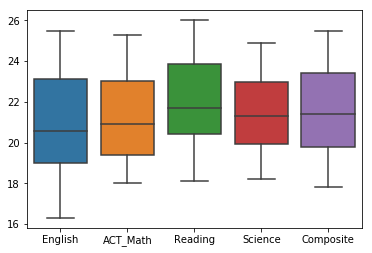

In [153]:
sns.boxplot(data=ACT_scores_df);

###### This boxplot clearly shows ACT participation is higher than SAT participation

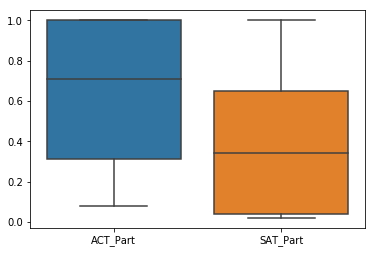

In [162]:
part_only_df = merge_df.drop(['State', 'English', 'ACT_Math', 'Reading', 
                              'Science', 'Composite', 'EB-Read+Write', 'SAT_Math', 'SAT_Total', 'ACT_Total'], axis =1)

sns.boxplot(data = part_only_df);

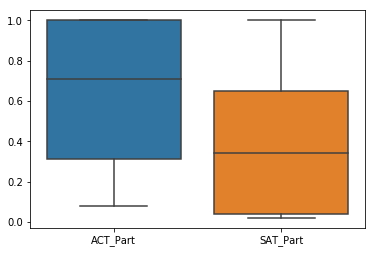

In [155]:
sns.boxplot(data = part_only_df);

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [ ]:
How normal it is. Normal meaning centrality, 

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

See above for summaries

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [156]:
control = merge_df.ACT_Part
experimental = merge_df.SAT_Part
result = stats.ttest_ind(experimental, control)
result.statistic, result.pvalue
t_stat, p_value = stats.ttest_ind(experimental, control)
t_stat, p_value


(-3.9681103343042943, 0.00013804998899950586)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [157]:
stats.t.interval(0.95, len(merge_df.SAT_Part)-1, loc=np.mean(merge_df.SAT_Part), scale=stats.sem(merge_df.SAT_Part))

(0.29163713379012524, 0.49276286620987475)

In [158]:
stats.t.interval(0.95, len(merge_df.ACT_Part)-1, loc=np.mean(merge_df.ACT_Part), scale=stats.sem(merge_df.ACT_Part))

(0.5690026482079291, 0.7509973517920709)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No. The p-value is lowered than the alpha thus there is a significant different between SAT and ACT participation.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No. Because not all students take the test, it's only a sample of the population in the states that are taking the test. Also the test are weighted differently and are created from two different institutions. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No. It's not enough information since the participation rate is not normally distributed, the data is not normal